In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('uber.csv')

In [3]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
data['dropoff_longitude'].fillna(data['dropoff_longitude'].mean(),inplace=True)

C:\Users\Pratiksha\AppData\Local\Temp\ipykernel_330896\4098053976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dropoff_longitude'].fillna(data['dropoff_longitude'].mean(),inplace=True)


In [8]:
data['dropoff_latitude'].fillna(data['dropoff_latitude'].mean(),inplace=True)

C:\Users\Pratiksha\AppData\Local\Temp\ipykernel_330896\1360929665.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dropoff_latitude'].fillna(data['dropoff_latitude'].mean(),inplace=True)


In [10]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
data.dtypes


Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [14]:
data=data.drop(['Unnamed: 0','key'],axis=1)

In [15]:
data.pickup_datetime=pd.to_datetime(data.pickup_datetime,errors='coerce')

In [16]:
data.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [18]:
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['hour'] = data['pickup_datetime'].dt.hour
data['month']=data['pickup_datetime'].dt.month
data['day']=data['pickup_datetime'].dt.day

In [19]:
data=data.drop('pickup_datetime',axis=1)

In [20]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,day
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,3.048425,13.491335,6.281795,15.704670
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,1.946946,6.515531,3.438925,8.687409
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.000000,9.000000,3.000000,8.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,3.000000,14.000000,6.000000,16.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,5.000000,19.000000,9.000000,23.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,6.000000,23.000000,12.000000,31.000000


In [21]:
#if have some categorical values 
data=pd.get_dummies(data,drop_first=True)

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
day_of_week             Axes(0.125,0.448049;0.352273x0.0939024)
hour                 Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
day                  Axes(0.547727,0.335366;0.352273x0.0939024)
dtype: object

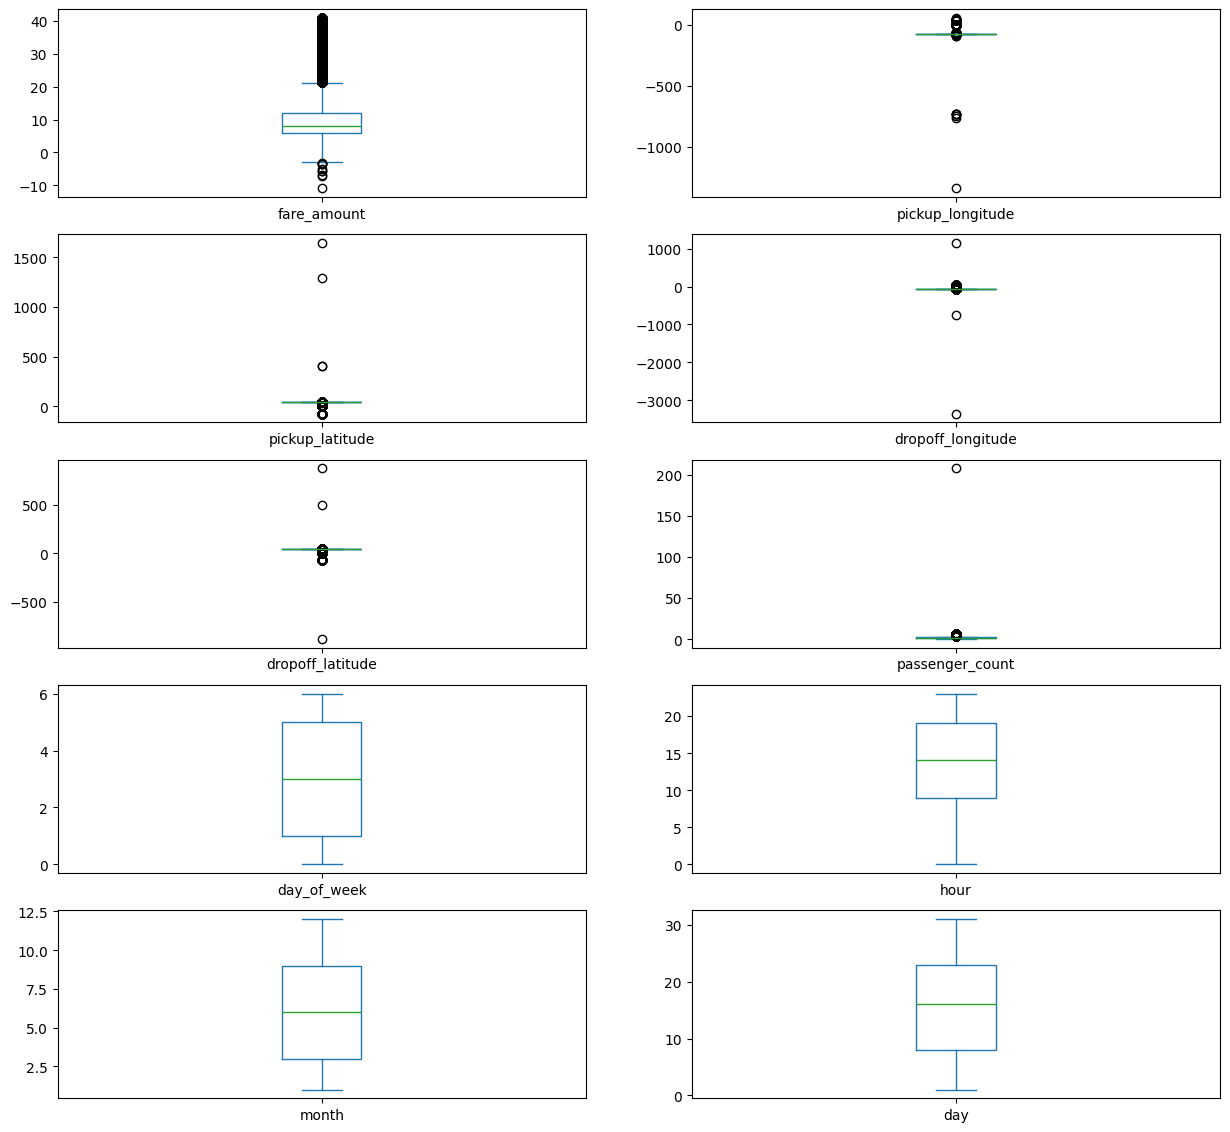

In [25]:
data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))


In [26]:
def remove_outliers(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    data[col]=np.where(data[col]<lower_bound,lower_bound,data[col])
    data[col]=np.where(data[col]>upper_bound,upper_bound,data[col])
    return data
    
    

In [27]:
def treat_outliers(data):
    numeric_cols=data.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        data=remove_outliers(data,col)
    return data

In [28]:
data=treat_outliers(data)

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
day_of_week             Axes(0.125,0.448049;0.352273x0.0939024)
hour                 Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
day                  Axes(0.547727,0.335366;0.352273x0.0939024)
dtype: object

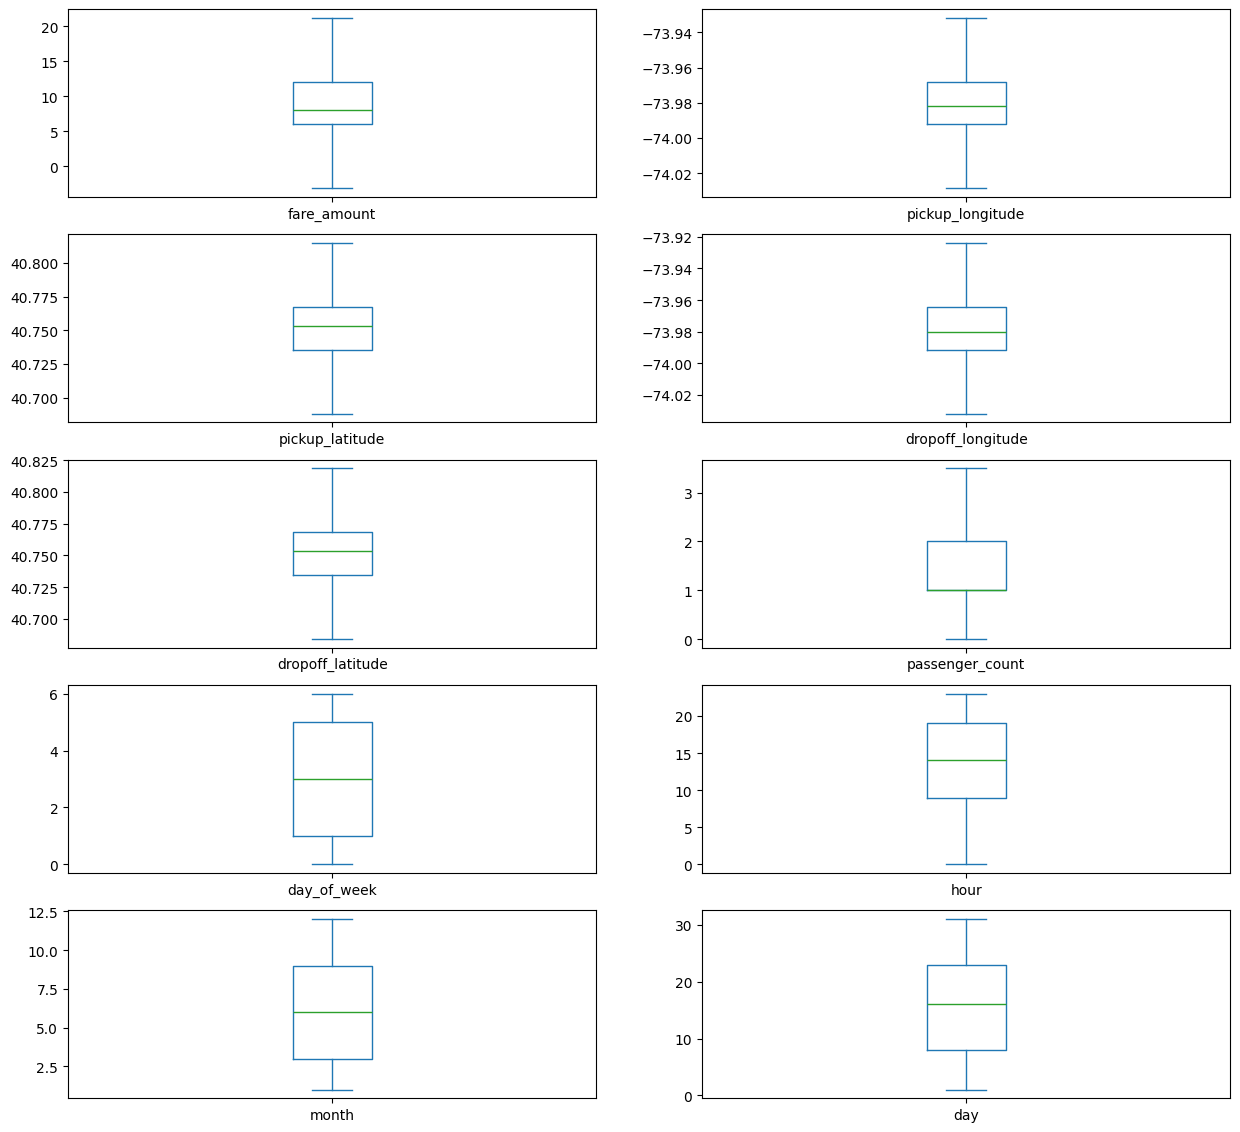

In [29]:
data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))

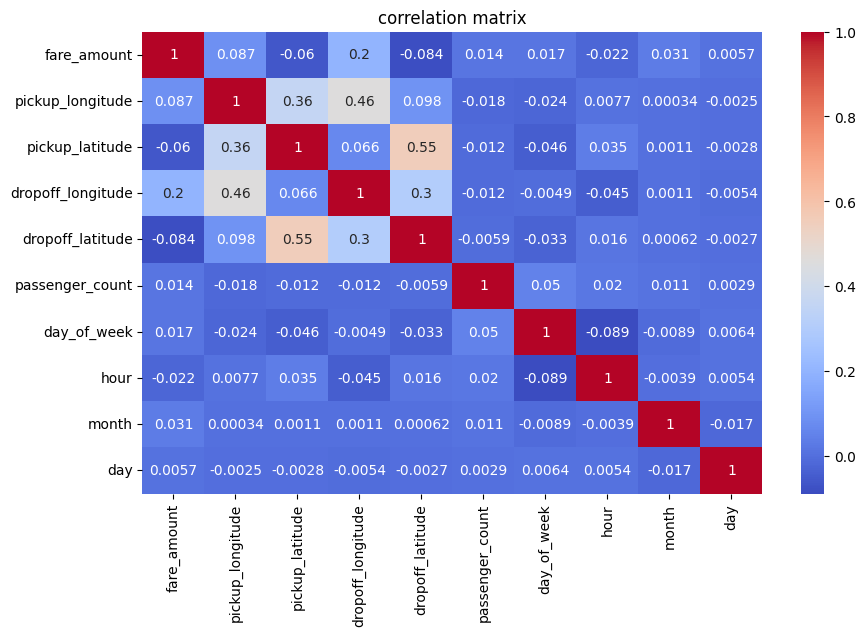

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()
            
               

In [34]:
x=data.drop('fare_amount',axis=1)
y=data['fare_amount']

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
regression=LinearRegression()

In [78]:
regression.fit(x_train,y_train)

LinearRegression()

In [79]:
y_pred=regression.predict(x_test)

In [80]:
y_pred

array([13.04127394,  8.57634419,  9.215486  , ..., 13.94188128,
        9.18840016,  9.9881195 ])

In [81]:
randomforest=RandomForestRegressor(n_estimators=50,random_state=42)

In [82]:
randomforest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [83]:
y_pred2=randomforest.predict(x_test)

In [84]:
y_pred2

array([19.623, 11.266, 14.536, ...,  8.691,  6.656,  4.82 ])

In [85]:
r1=r2_score(y_test,y_pred)

In [86]:
r1

0.05968782624127433

In [87]:
mse=mean_squared_error(y_test,y_pred)

In [88]:
print(mse)

22.900377666384223


In [89]:
rmse=np.sqrt(mse)

In [90]:
rmse

4.785433905758622

In [91]:
r2=r2_score(y_test,y_pred2)

In [92]:
r2

0.7599475636510058

In [93]:
mse2=mean_squared_error(y_test,y_pred2)

In [94]:
mse2

5.846240860791169

In [97]:
rmse2=np.sqrt(mse2)

In [98]:
rmse2

2.4179000932195627